In [41]:
import os
import re
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.datasets import fetch_20newsgroups
#from tensorflow.keras import layers
from keras import layers
from sklearn.model_selection import train_test_split
#from tensorflow.keras.models import Sequential
from keras.models import Sequential
#from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
#from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout

In [42]:
nltk.download("punkt")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")
nltk.download("stopwords")
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sena\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [43]:
df = pd.read_csv('drugsComTrain_raw.csv')

In [44]:
df.shape

(161297, 7)

In [45]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [46]:
report=['condition','review']

In [47]:

df['report'] =df[report].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)
df

,uniqueID,drugName,condition,review,rating,date,usefulCount,report
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,"Left Ventricular Dysfunction_""It has no side e..."
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,"ADHD_""My son is halfway through his fourth wee..."
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17,"Birth Control_""I used to take another oral con..."
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10,"Birth Control_""This is my first time using any..."
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37,"Opiate Dependence_""Suboxone has completely tur..."
...,...,...,...,...,...,...,...,...
161292,191035,Campral,Alcohol Dependence,"""I wrote my first report in Mid-October of 201...",10,31-May-15,125,"Alcohol Dependence_""I wrote my first report in..."
161293,127085,Metoclopramide,Nausea/Vomiting,"""I was given this in IV before surgey. I immed...",1,1-Nov-11,34,"Nausea/Vomiting_""I was given this in IV before..."
161294,187382,Orencia,Rheumatoid Arthritis,"""Limited improvement after 4 months, developed...",2,15-Mar-14,35,"Rheumatoid Arthritis_""Limited improvement afte..."
161295,47128,Thyroid desiccated,Underactive Thyroid,"""I&#039;ve been on thyroid medication 49 years...",10,19-Sep-15,79,"Underactive Thyroid_""I&#039;ve been on thyroid..."


In [48]:

df_train = df.drop(['uniqueID','drugName','date','usefulCount','condition','review'],axis=1)
df_train .head(10)

,rating,report
0,9,"Left Ventricular Dysfunction_""It has no side e..."
1,8,"ADHD_""My son is halfway through his fourth wee..."
2,5,"Birth Control_""I used to take another oral con..."
3,8,"Birth Control_""This is my first time using any..."
4,9,"Opiate Dependence_""Suboxone has completely tur..."
5,2,"Benign Prostatic Hyperplasia_""2nd day on 5mg s..."
6,1,"Emergency Contraception_""He pulled out, but he..."
7,10,"Bipolar Disorde_""Abilify changed my life. Ther..."
8,1,"Epilepsy_"" I Ve had nothing but problems with..."
9,8,"Birth Control_""I had been on the pill for many..."


In [49]:
def clean_text (text):
    # Remove Pre and Post Spaces
    text = str(text).strip()
    
    # Lower case the entire text
    text = str(text).lower()

    # Substitute New Line Characters with spaces 
    text = re.sub(r"\n", r" ", text)
        
    # Tokenize the sentence
    word_tokens = word_tokenize(text)
    
    # Remove the punctuation and  special characters from each individual word
    cleaned_text = []
    for word in word_tokens:
        cleaned_text.append("".join([char for char in word if char.isalnum()]))
    
    # Specify the stop words list
    stop_words = stopwords.words('english')
    
    # Remove the stopwords and words containing less then 2 characters
    text_tokens = [word for word in cleaned_text if (len(word) > 2) and (word not in stop_words)]
    
    #Lemmatize each word in the word list
    text = lemmatize (text_tokens)
    
    return text

In [50]:
def get_wordnet_pos (tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN


In [51]:
def lemmatize (word_list):
    wl = WordNetLemmatizer()
    word_pos_tags = pos_tag(word_list)
    lemmatized_list = []
    for tag in word_pos_tags:
        lemmatize_word = wl.lemmatize(tag[0],get_wordnet_pos(tag[1]))
        lemmatized_list.append(lemmatize_word)
    return " ".join(lemmatized_list)

In [52]:
df_train['report'] = df_train['report'].apply(lambda x: clean_text(x))

In [53]:
df_train['rating']

0          9
1          8
2          5
3          8
4          9
          ..
161292    10
161293     1
161294     2
161295    10
161296     9
Name: rating, Length: 161297, dtype: int64

In [54]:
def map_rating_to_class(rating):
    if rating >= 7:
        return 'positive'
    elif rating <= 4:
        return 'negative'
    else:
        return 'neutral'

# Apply the function to create a new column 'rating_class' in the DataFrame
# Apply the function to create a new column 'class' in the DataFrame using .loc[row_indexer, col_indexer]
df_train.loc[:, 'rating'] = df_train['rating'].apply(map_rating_to_class)

#print(df.head(10))

In [55]:

df_train['rating'] 

0         positive
1         positive
2          neutral
3         positive
4         positive
            ...   
161292    positive
161293    negative
161294    negative
161295    positive
161296    positive
Name: rating, Length: 161297, dtype: object

In [56]:
Sentiment_train = df_train['rating']
Report_train = df_train['report']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(Report_train, Sentiment_train, test_size=0.25)


In [58]:
from numpy import array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# One-Hot Encoding of Sentiment_Train
Sentiment_train = array(Sentiment_train)
# integer encode
label_encoder = LabelEncoder()
Sentiment_train_integer_encoded = label_encoder.fit_transform(Sentiment_train)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_train_integer_encoded = Sentiment_train_integer_encoded.reshape(len(Sentiment_train_integer_encoded), 1)
Sentiment_train_onehot_encoded = onehot_encoder.fit_transform(Sentiment_train_integer_encoded)
# One-Hot Encoding of Sentiment_Test
Sentiment_test = array( y_test)
# integer encode
label_encoder = LabelEncoder()
Sentiment_test_integer_encoded = label_encoder.fit_transform(y_test)
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
Sentiment_test_integer_encoded = Sentiment_test_integer_encoded.reshape(len(Sentiment_test_integer_encoded), 1)
Sentiment_test_onehot_encoded = onehot_encoder.fit_transform(Sentiment_test_integer_encoded)
print("Sentiment_Train shape after one-hot encoding : ",Sentiment_train_onehot_encoded.shape,"  "
     ,"Sentiment_Test shape after one-hot encoding : ",Sentiment_test_onehot_encoded.shape,"\n")

Sentiment_Train shape after one-hot encoding :  (161297, 3)    Sentiment_Test shape after one-hot encoding :  (40325, 3) 



In [59]:
# Tokenize and Create Sequence For Train set
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(Report_train)
Report_train_sequences = tokenizer.texts_to_sequences(Report_train)
Report_train_padded = pad_sequences(Report_train_sequences, maxlen=100, padding='post', truncating='post')             # maxlen is the size of words in a review here it is 100
# Tokenize and Create Sequence For Test set
Report_test_sequences = tokenizer.texts_to_sequences(X_test)
Report_test_padded = pad_sequences(Report_test_sequences, maxlen=100, padding='post', truncating='post')
print("Report_Train shape after padding : ",Report_train_padded.shape,"  ","Report_Test shape after padding: ",Report_test_padded.shape)
Sentiment_labels = ['Negative', 'Neutral', 'Positive']    

Report_Train shape after padding :  (161297, 100)    Report_Test shape after padding:  (40325, 100)


In [60]:
vocab_size = len(tokenizer.index_word) + 1
vocab_size 

60563

# embedding by glove

In [61]:
tokenizer.index_word

{1: '039',
 2: 'take',
 3: 'day',
 4: 'get',
 5: 'month',
 6: 'year',
 7: 'work',
 8: 'week',
 9: 'pain',
 10: 'start',
 11: 'effect',
 12: 'side',
 13: 'control',
 14: 'time',
 15: 'go',
 16: 'feel',
 17: 'birth',
 18: 'first',
 19: 'like',
 20: 'pill',
 21: 'period',
 22: 'use',
 23: 'bad',
 24: 'make',
 25: 'help',
 26: 'well',
 27: 'would',
 28: 'anxiety',
 29: 'back',
 30: 'try',
 31: 'medication',
 32: 'one',
 33: 'doctor',
 34: 'weight',
 35: 'also',
 36: 'good',
 37: 'give',
 38: 'medicine',
 39: 'since',
 40: 'life',
 41: 'depression',
 42: 'still',
 43: 'stop',
 44: 'really',
 45: 'much',
 46: 'experience',
 47: 'sleep',
 48: 'acne',
 49: 'never',
 50: 'hour',
 51: 'two',
 52: 'quot',
 53: 'say',
 54: 'last',
 55: 'felt',
 56: 'think',
 57: 'night',
 58: 'even',
 59: 'every',
 60: 'gain',
 61: 'great',
 62: 'drug',
 63: 'thing',
 64: 'cramp',
 65: 'ago',
 66: 'lose',
 67: 'dose',
 68: 'little',
 69: 'come',
 70: 'put',
 71: 'find',
 72: 'know',
 73: 'problem',
 74: 'almost',


In [62]:
import os

home = 'C:\\Users\\Sena\\Desktop\\Sentiment_Analysis2-\\'
glove_embedding_filepath = os.path.join(home, "glove.6B.300d.txt")


In [63]:
glove_embedding_filepath 

'C:\\Users\\Sena\\Desktop\\Sentiment_Analysis2-\\glove.6B.300d.txt'

In [64]:
def create_embedding_matrix (filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    
    with open(filepath, encoding='utf-8') as file:
        for line in file:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word]
                embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]
    
    return embedding_matrix

In [65]:
embedding_dim = 100
embedding_matrix = create_embedding_matrix(glove_embedding_filepath, tokenizer.word_index, embedding_dim)


In [66]:
len(embedding_matrix)

60563

# RNN

In [67]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
checkpoint_filepath = os.getcwd()
model_checkpoint_callback = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_loss', mode='min', save_best_only=True)
callbacks = [EarlyStopping(patience=2), model_checkpoint_callback]

In [34]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout

embedding_dim = 100
sequence_len=100
RNN_model = Sequential()
RNN_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_len,weights = [embedding_matrix], trainable = False))
RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
RNN_model.add(Dense(3, activation='softmax')) # Change activation function to softmax, and output dimension to match number of classes
RNN_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Change loss function
print(RNN_model.summary())


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               29312     
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 6,085,999
Trainable params: 29,699
Non-trainable params: 6,056,300
_________________________________________________________________
None


In [35]:
history_RNN = RNN_model.fit(Report_train_padded,Sentiment_train_onehot_encoded, epochs=5, batch_size=64, validation_data=(Report_test_padded, Sentiment_test_onehot_encoded), callbacks=callbacks)



Epoch 1/5
2520/2521 [============================>.] - ETA: 0s - loss: 0.8386 - accuracy: 0.6620

INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


2521/2521 [==============================] - 88s 34ms/step - loss: 0.8386 - accuracy: 0.6620 - val_loss: 0.8397 - val_accuracy: 0.6628
Epoch 2/5
2520/2521 [============================>.] - ETA: 0s - loss: 0.8394 - accuracy: 0.6618

INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


2521/2521 [==============================] - 97s 39ms/step - loss: 0.8393 - accuracy: 0.6618 - val_loss: 0.8367 - val_accuracy: 0.6621
Epoch 3/5
2521/2521 [==============================] - 95s 38ms/step - loss: 0.8387 - accuracy: 0.6608 - val_loss: 0.8378 - val_accuracy: 0.6627
Epoch 4/5
2520/2521 [============================>.] - ETA: 0s - loss: 0.8392 - accuracy: 0.6614

INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


INFO:tensorflow:Assets written to: C:\Users\Sena\Desktop\Sentiment_Analysis2-\assets


2521/2521 [==============================] - 98s 39ms/step - loss: 0.8392 - accuracy: 0.6613 - val_loss: 0.8324 - val_accuracy: 0.6633
Epoch 5/5
2521/2521 [==============================] - 97s 38ms/step - loss: 0.8395 - accuracy: 0.6618 - val_loss: 0.8398 - val_accuracy: 0.6635


In [36]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc = RNN_model.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = RNN_model.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

1261/1261 [==============================] - 16s 13ms/step - loss: 0.8399 - accuracy: 0.6635

 Evaluated model accuracy on test data : 0.6634594202041626

 stop time: Wed May  3 21:48:15 2023 

1261/1261 [==============================] - 15s 12ms/step


In [37]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [38]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       1.00      0.00      0.00     10024
     Neutral       0.00      0.00      0.00      3552
    Positive       0.66      1.00      0.80     26749

    accuracy                           0.66     40325
   macro avg       0.55      0.33      0.27     40325
weighted avg       0.69      0.66      0.53     40325

Accuracy: 0.663459
Cohen_score: 0.000521


C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


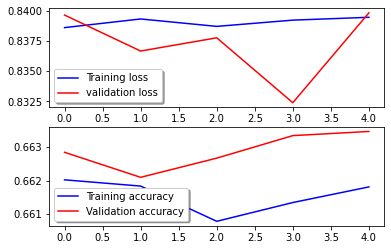

In [39]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_RNN.history['loss'], color='b', label="Training loss")
ax[0].plot(history_RNN.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_RNN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_RNN.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

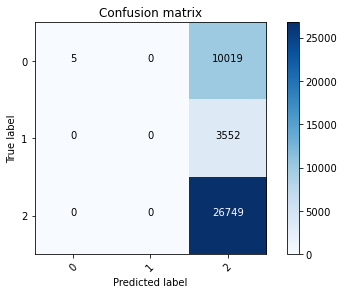

In [40]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

# LSTM

In [68]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from keras.layers import Embedding, Conv1D, LSTM, Dense, Dropout
LSTM_model = Sequential()
sequence_len=100
LSTM_model.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len,weights = [embedding_matrix], trainable = False))
LSTM_model.add(SpatialDropout1D(0.3))
LSTM_model.add(Bidirectional(LSTM(100, dropout=0.3, recurrent_dropout=0.3)))
LSTM_model.add(Dense(1024, activation="relu"))
LSTM_model.add(Dropout(0.8))
LSTM_model.add(Dense(1024, activation="relu"))
LSTM_model.add(Dropout(0.8))
LSTM_model.add(Dense(3))
LSTM_model.add(Activation("softmax"))
LSTM_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(LSTM_model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 spatial_dropout1d (SpatialD  (None, 100, 100)         0         
 ropout1D)                                                       
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1024)              205824    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 1024)             

In [70]:
history_LSTM = LSTM_model.fit(Report_train_padded,Sentiment_train_onehot_encoded, epochs=5, batch_size=64, validation_data=(Report_test_padded, Sentiment_test_onehot_encoded))



Epoch 1/5
2521/2521 [==============================] - 2552s 1s/step - loss: 0.7640 - accuracy: 0.6944 - val_loss: 0.6732 - val_accuracy: 0.7303
Epoch 2/5
2521/2521 [==============================] - 2478s 983ms/step - loss: 0.7115 - accuracy: 0.7211 - val_loss: 0.6184 - val_accuracy: 0.7644
Epoch 3/5
2521/2521 [==============================] - 2645s 1s/step - loss: 0.6821 - accuracy: 0.7356 - val_loss: 0.6183 - val_accuracy: 0.7664
Epoch 4/5
2521/2521 [==============================] - 3007s 1s/step - loss: 0.6642 - accuracy: 0.7444 - val_loss: 0.5891 - val_accuracy: 0.7726
Epoch 5/5
2521/2521 [==============================] - 3582s 1s/step - loss: 0.6532 - accuracy: 0.7483 - val_loss: 0.5956 - val_accuracy: 0.7602


In [71]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc = LSTM_model.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = LSTM_model.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

1261/1261 [==============================] - 82s 65ms/step - loss: 0.5956 - accuracy: 0.7602

 Evaluated model accuracy on test data : 0.7601984143257141

 stop time: Fri May  5 01:07:15 2023 

1261/1261 [==============================] - 64s 50ms/step


In [72]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [73]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.81      0.42      0.56      9842
     Neutral       0.00      0.00      0.00      3531
    Positive       0.75      0.98      0.85     26952

    accuracy                           0.76     40325
   macro avg       0.52      0.47      0.47     40325
weighted avg       0.70      0.76      0.71     40325

Accuracy: 0.760198
Cohen_score: 0.378105


C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sena\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


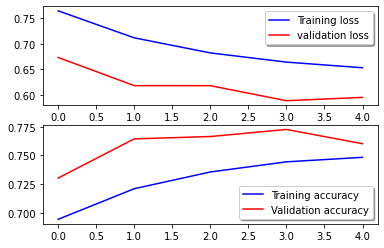

In [74]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_LSTM .history['loss'], color='b', label="Training loss")
ax[0].plot(history_LSTM .history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_LSTM .history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_LSTM .history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

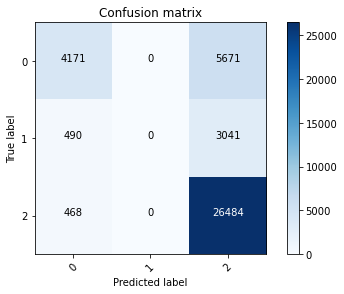

In [75]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

# LSTM_CNN

In [31]:
# Build the CNN-LSTM model
modelCNN_LSTM = Sequential()
sequence_len=100
modelCNN_LSTM.add(layers.Embedding(input_dim=vocab_size, output_dim=100, input_length=sequence_len ,weights = [embedding_matrix], trainable = False))
modelCNN_LSTM.add(Conv1D(64, 5, activation='relu'))
modelCNN_LSTM.add(MaxPooling1D(pool_size=4))
modelCNN_LSTM.add(LSTM(64))
modelCNN_LSTM.add(Dense(len(label_encoder.classes_), activation='softmax'))
# Compile the model
modelCNN_LSTM.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(modelCNN_LSTM.summary())
# Train the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 6,121,583
Trainable params: 65,283
Non-trainable params: 6,056,300
_______________________________________

In [32]:
history_LSTM_CNN= modelCNN_LSTM.fit(Report_train_padded,Sentiment_train_onehot_encoded, epochs=15, batch_size=32, validation_data=(Report_test_padded, Sentiment_test_onehot_encoded))



Epoch 1/15
5041/5041 [==============================] - 127s 25ms/step - loss: 0.6655 - accuracy: 0.7398 - val_loss: 0.5738 - val_accuracy: 0.7780
Epoch 2/15
5041/5041 [==============================] - 126s 25ms/step - loss: 0.5633 - accuracy: 0.7853 - val_loss: 0.5146 - val_accuracy: 0.8070
Epoch 3/15
5041/5041 [==============================] - 124s 25ms/step - loss: 0.5187 - accuracy: 0.8030 - val_loss: 0.4825 - val_accuracy: 0.8163
Epoch 4/15
5041/5041 [==============================] - 131s 26ms/step - loss: 0.4851 - accuracy: 0.8170 - val_loss: 0.4434 - val_accuracy: 0.8367
Epoch 5/15
5041/5041 [==============================] - 131s 26ms/step - loss: 0.4553 - accuracy: 0.8280 - val_loss: 0.4069 - val_accuracy: 0.8455
Epoch 6/15
5041/5041 [==============================] - 126s 25ms/step - loss: 0.4280 - accuracy: 0.8388 - val_loss: 0.3933 - val_accuracy: 0.8527
Epoch 7/15
5041/5041 [==============================] - 128s 25ms/step - loss: 0.4032 - accuracy: 0.8476 - val_loss: 0

In [33]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc =modelCNN_LSTM.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred = modelCNN_LSTM.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

1261/1261 [==============================] - 15s 12ms/step - loss: 0.2442 - accuracy: 0.9135

 Evaluated model accuracy on test data : 0.9135276079177856

 stop time: Thu May  4 10:49:45 2023 

1261/1261 [==============================] - 14s 11ms/step


In [34]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [35]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.86      0.93      0.89     10054
     Neutral       0.65      0.59      0.62      3609
    Positive       0.97      0.95      0.96     26662

    accuracy                           0.91     40325
   macro avg       0.83      0.82      0.82     40325
weighted avg       0.91      0.91      0.91     40325

Accuracy: 0.913528
Cohen_score: 0.825912


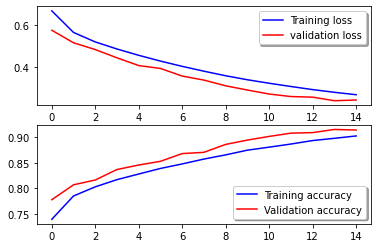

In [36]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_LSTM_CNN .history['loss'], color='b', label="Training loss")
ax[0].plot(history_LSTM_CNN .history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_LSTM_CNN.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_LSTM_CNN.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

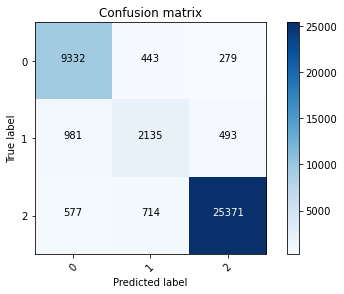

In [37]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))

In [38]:
modelCNN_LSTM.save('my_lstm_cnn.h5')

# CNN

In [54]:
vocab_size = len(tokenizer.index_word) + 1
sequence_len=100
num_epochs = 10
batch_size = 64
model_cnn = Sequential()
model_cnn.add(layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=sequence_len,weights = [embedding_matrix], trainable = False))
model_cnn.add(layers.Conv1D(filters=128, kernel_size=5, activation='relu'))
model_cnn.add(layers.GlobalMaxPool1D())
model_cnn.add(layers.Dense(64, activation='relu'))
model_cnn.add(layers.Dense(32, activation='relu'))
model_cnn.add(layers.Dense(3, activation='softmax'))
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_cnn.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 100)          6056300   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 3)                 99        
                                                      

In [55]:
history_cnn = model_cnn.fit(Report_train_padded ,Sentiment_train_onehot_encoded, epochs=num_epochs,validation_split=0.1, batch_size = batch_size)


Epoch 1/10
2269/2269 [==============================] - 48s 21ms/step - loss: 0.6476 - accuracy: 0.7466 - val_loss: 0.6224 - val_accuracy: 0.7595
Epoch 2/10
2269/2269 [==============================] - 56s 25ms/step - loss: 0.5392 - accuracy: 0.7943 - val_loss: 0.5743 - val_accuracy: 0.7792
Epoch 3/10
2269/2269 [==============================] - 56s 25ms/step - loss: 0.4702 - accuracy: 0.8224 - val_loss: 0.5884 - val_accuracy: 0.7743
Epoch 4/10
2269/2269 [==============================] - 55s 24ms/step - loss: 0.4179 - accuracy: 0.8421 - val_loss: 0.5992 - val_accuracy: 0.7896
Epoch 5/10
2269/2269 [==============================] - 55s 24ms/step - loss: 0.3767 - accuracy: 0.8592 - val_loss: 0.5807 - val_accuracy: 0.7888
Epoch 6/10
2269/2269 [==============================] - 55s 24ms/step - loss: 0.3406 - accuracy: 0.8740 - val_loss: 0.6315 - val_accuracy: 0.7779
Epoch 7/10
2269/2269 [==============================] - 54s 24ms/step - loss: 0.3134 - accuracy: 0.8850 - val_loss: 0.6587 -

In [56]:
import time
import itertools
import warnings
from sklearn.metrics import confusion_matrix
# Model Evaluation on Test data
test_loss,test_acc =model_cnn.evaluate(Report_test_padded, Sentiment_test_onehot_encoded)
print("\n Evaluated model accuracy on test data :",test_acc)
seconds= time.time()
time_stop = time.ctime(seconds)
print("\n","stop time:", time_stop,"\n")
# Predict the values from the Test dataset
Sentiment_pred =model_cnn.predict(Report_test_padded)
# Convert predictions classes to one hot vectors
Sentiment_pred_classes = np.argmax(Sentiment_pred,axis = 1)
# computing the confusion matrix

1261/1261 [==============================] - 10s 8ms/step - loss: 0.2419 - accuracy: 0.9186

 Evaluated model accuracy on test data : 0.9186360836029053

 stop time: Thu May  4 02:14:54 2023 

1261/1261 [==============================] - 9s 7ms/step


In [57]:
confusion_mtx = confusion_matrix(Sentiment_test_integer_encoded, Sentiment_pred_classes)
confusion_matrix

<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

In [58]:
#Printing Classification Report for Sentiment
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Sentiment_test_integer_encoded, Sentiment_pred_classes, target_names = Sentiment_labels))
accuracy = accuracy_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Accuracy: %f' % accuracy)
cohen_score = cohen_kappa_score(Sentiment_test_integer_encoded, Sentiment_pred_classes)
print('Cohen_score: %f' % cohen_score)

              precision    recall  f1-score   support

    Negative       0.87      0.93      0.90     10024
     Neutral       0.68      0.67      0.67      3552
    Positive       0.97      0.95      0.96     26749

    accuracy                           0.92     40325
   macro avg       0.84      0.85      0.84     40325
weighted avg       0.92      0.92      0.92     40325

Accuracy: 0.918636
Cohen_score: 0.836267


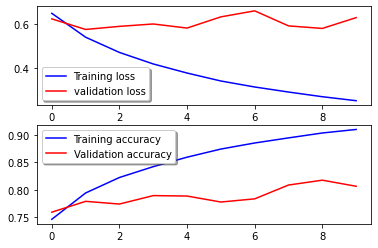

In [59]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history_cnn.history['loss'], color='b', label="Training loss")
ax[0].plot(history_cnn.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)
ax[1].plot(history_cnn.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history_cnn.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)
plt.show()

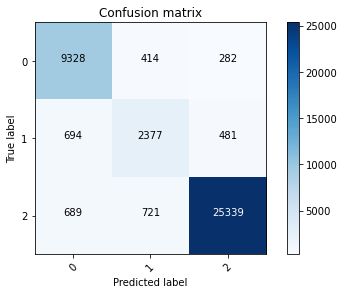

In [60]:
# Defining function for plotting confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    '''
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    '''
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))